# Getting started on Keras

## 1. Install 

Keras is a python module developped for machine learning based applications, and more specifically, for neural based solutions. Keras is built upon a python backend which needs to be installed and loaded before Keras. Three backends are available: Theano, TensorFlow and CNTK. We will work mostly with Tensorflow. 

All installation packages are available on the website https://keras.io/#installation. Follow instructions very carefully, and whenever possible, choose distributions which are the most stable. It is generally easier to install these packages using Anaconda (or its lightweight version miniconda) and for python 2.7. 

## 2. Models and layers

In Keras, a neural network  is a model, and is comprised of layers. Keras offers many models ( Feedforward, CNN, RNN, RBM, SVM, ...), though the most useful one for our project is the feedforward neural net (denoted as sequential in Keras https://keras.io/models/sequential/ ). A model offers many methods among which "fit", "compile", "history", "save_weights", "load_weights". Before getting started, read this documentation https://keras.io/getting-started/sequential-model-guide/. 


## 3. Datasets 

Many datasets are available for supervised learning purposes, https://keras.io/datasets/ , for your personal scientific curiosity, have a look at these classical datasets which serve often as a benchmark for constests. In this course, you will be building your own dataset, and a few rules need to be taken into consideration: the training and validation dataset sizes ratio, the randomness of data (overfitting), the batch training method (batch, online, mini-batch, ...) , the number of epochs for training (convergence speed), ... refer to D. Kriesel's book for these design criteria (http://www.dkriesel.com/en/science/neural_networks). 

## 4. Build and train a neural net 

Question: Build and train a neural network to perform the OR, AND, and XOR operations. 

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_70 

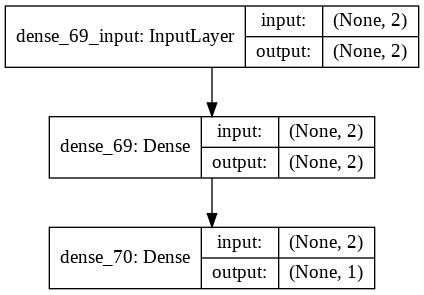

In [25]:
# Type your code here 

import keras
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np

N = 2

# AND Model
and_model=Sequential()
# Input Layer
and_model.add(Dense(1, activation='sigmoid', input_dim=N))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(and_model.summary())

# OR Model
or_model=Sequential()
or_model.add(Dense(1, activation='sigmoid', input_dim=N))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(or_model.summary())

# XOR Model
xor_model=Sequential()
xor_model.add(Dense(N, activation='sigmoid', input_dim=N))
xor_model.add(Dense(1, activation='sigmoid', input_dim=N))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(xor_model.summary())
plot_model(xor_model,show_shapes=True)



# Training

#AND
#inputs = [0,0], output = 0
#inputs = [0,1], output = 0
#inputs = [1,0], output = 0
#inputs = [1,1], output = 1

#OR 
#inputs = [0,0], output = 0
#inputs = [0,1], output = 1
#inputs = [1,0], output = 1
#inputs = [1,1], output = 1

#XOR 
#inputs = [0,0], output = 0
#inputs = [0,1], output = 1
#inputs = [1,0], output = 1
#inputs = [1,1], output = 0

